In [1]:
import zipfile
import numpy as np
import pandas as pd
import os
from PIL import Image
from collections import defaultdict
import shutil
import matplotlib.pyplot as plt


# Data Loading

dataset penyakit daun jagung bersumber dari kaggle (https://www.kaggle.com/datasets/abdelrahmanemad2199/corn-or-maize-leaf-disease-dataset). untuk memudahkan data load, saya upload dataset ke google drive

In [2]:
!gdown 1VHYXLnWOf1OMXFI0om3aaZy5uOIxBDE3


Downloading...
From (original): https://drive.google.com/uc?id=1VHYXLnWOf1OMXFI0om3aaZy5uOIxBDE3
From (redirected): https://drive.google.com/uc?id=1VHYXLnWOf1OMXFI0om3aaZy5uOIxBDE3&confirm=t&uuid=db138c54-8bdb-4a70-b404-e5c3d5b9673d
To: /content/archive (40).zip
100% 171M/171M [00:03<00:00, 52.4MB/s]


#### extract file zip dataset

In [3]:
# extract folder zip

with zipfile.ZipFile('/content/archive (40).zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')


#### memeriksa jumlah kelas dalam dataset dan menampilkan resolusi gambar di dalam dataset

In [4]:
# Fungsi untuk mengecek folder dan resolusi gambar
def check_folders_and_resolutions(directory):
    # Menyimpan nama folder, resolusi gambar, dan jumlah gambar di setiap folder
    folder_list = []
    image_resolutions = []
    folder_image_count = {}
    resolution_count = defaultdict(int)  # Menyimpan jumlah gambar berdasarkan resolusi

    # Menjelajah direktori utama dan subfolder
    for root, dirs, files in os.walk(directory):
        # Menyimpan subfolder di dalam folder_list
        for dir_name in dirs:
            folder_list.append(os.path.join(root, dir_name))  # Menambahkan path lengkap subfolder
            folder_image_count[os.path.join(root, dir_name)] = 0  # Inisialisasi jumlah gambar di folder

        # Mengecek file gambar di dalam folder (termasuk subfolder)
        for file_name in files:
            file_path = os.path.join(root, file_name)

            # Mengecek apakah file merupakan gambar
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                try:
                    with Image.open(file_path) as img:
                        # Dapatkan resolusi gambar
                        resolution = img.size  # Resolusi berupa tuple (lebar, tinggi)
                        image_resolutions.append((file_name, resolution))

                        # Update jumlah gambar di folder
                        folder_image_count[root] += 1

                        # Mengelompokkan resolusi dan menghitung jumlah gambar untuk masing-masing resolusi
                        resolution_count[resolution] += 1
                except Exception as e:
                    print(f"Error membuka {file_name}: {e}")

    # Menampilkan hasil folder yang ditemukan dan jumlah gambar di masing-masing folder
    print("Folder yang ditemukan di dalam direktori beserta jumlah gambar:")
    for folder in folder_list:
        print(f"- {folder}: {folder_image_count[folder]} gambar")

    # Menampilkan jumlah gambar berdasarkan resolusi
    print("\nJumlah gambar berdasarkan resolusi:")
    for resolution, count in resolution_count.items():
        print(f"- {resolution[0]}x{resolution[1]}: {count} gambar")

# Tentukan path folder yang ingin Anda cek
directory = '/content/dataset/corn/data'  # Gantilah dengan path folder Anda

# Panggil fungsi untuk mengecek folder dan resolusi gambar
check_folders_and_resolutions(directory)


Folder yang ditemukan di dalam direktori beserta jumlah gambar:
- /content/dataset/corn/data/Gray_Leaf_Spot: 2565 gambar
- /content/dataset/corn/data/Healthy: 3476 gambar
- /content/dataset/corn/data/Common_Rust: 3576 gambar
- /content/dataset/corn/data/Blight: 2743 gambar

Jumlah gambar berdasarkan resolusi:
- 256x256: 12360 gambar


#### menghapus dataset Common_rust, karena pada sistem ini hanya mengklasifikasikan daun jagung sehat, Blight (Hawar Daun), dan gray leaf spot (Kawat Daun)

In [5]:
# drop common rust

# Path to the folder you want to delete
folder_path = '/content/dataset//corn/data/Common_Rust'

# Check if the folder exists before attempting to delete
if os.path.exists(folder_path):
    try:
        shutil.rmtree(folder_path)
        print(f"Folder '{folder_path}' deleted successfully.")
    except OSError as e:
        print(f"Error deleting folder '{folder_path}': {e}")
else:
    print(f"Folder '{folder_path}' not found.")


Folder '/content/dataset//corn/data/Common_Rust' deleted successfully.


In [6]:
import os
import pandas as pd

sdir = '/content/dataset/corn/data'

# Inisialisasi list untuk menyimpan file paths dan labels
filepaths = []
labels = []

# Menyusun list kelas berdasarkan subfolder dalam direktori
classlist = os.listdir(sdir)

# Menyusun file paths dan labels untuk setiap file
for klass in classlist:
    classpath = os.path.join(sdir, klass)
    if os.path.isdir(classpath):  # Memeriksa apakah itu direktori
        flist = os.listdir(classpath)
        for f in flist:
            fpath = os.path.join(classpath, f)
            filepaths.append(fpath)
            labels.append(klass)

# Membuat DataFrame dari file paths dan labels
df = pd.DataFrame({
    'image_path': filepaths,
    'category': labels  # Label berdasarkan nama subfolder
})

# Menampilkan DataFrame untuk memeriksa hasil
print(df.head())

# Menampilkan jumlah label per kategori
print(df['category'].value_counts())


                                          image_path        category
0  /content/dataset/corn/data/Gray_Leaf_Spot/6807...  Gray_Leaf_Spot
1  /content/dataset/corn/data/Gray_Leaf_Spot/Corn...  Gray_Leaf_Spot
2  /content/dataset/corn/data/Gray_Leaf_Spot/d072...  Gray_Leaf_Spot
3  /content/dataset/corn/data/Gray_Leaf_Spot/0683...  Gray_Leaf_Spot
4  /content/dataset/corn/data/Gray_Leaf_Spot/Corn...  Gray_Leaf_Spot
category
Healthy           3476
Blight            2743
Gray_Leaf_Spot    2565
Name: count, dtype: int64


#### menampilkan gambar masing-masing dataset daun jagung

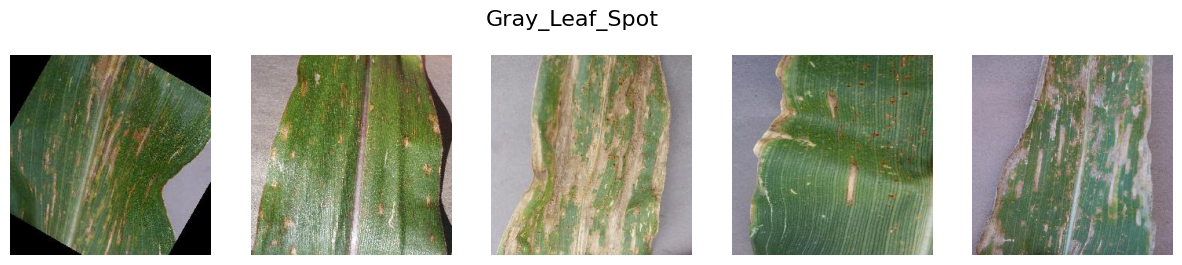

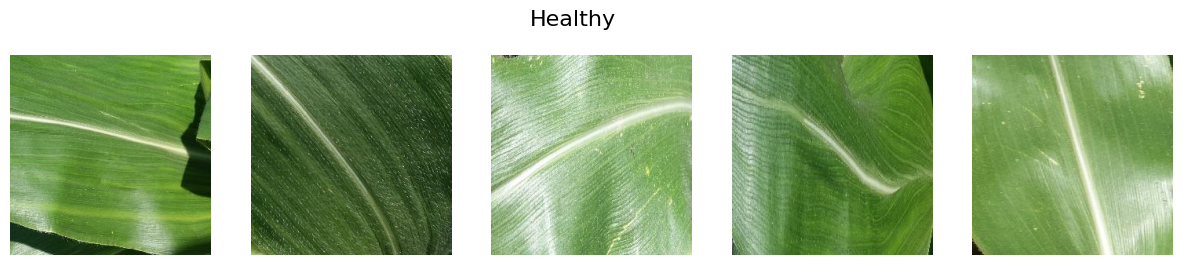

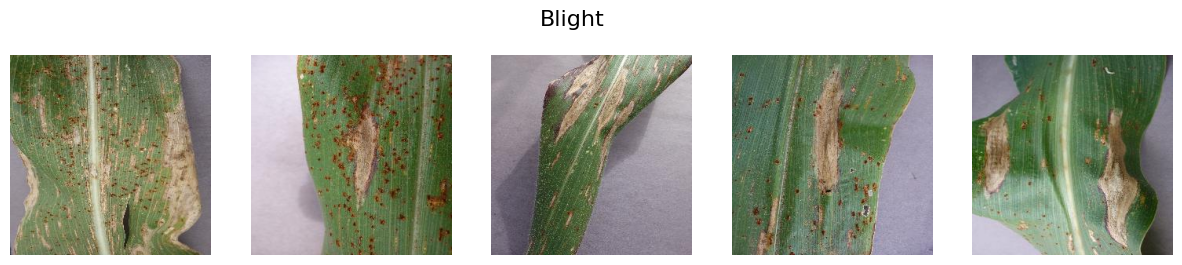

In [7]:
# Path to the image directory
image_dir = '/content/dataset/corn/data'

# Get a list of subfolders (classes)
class_folders = [f for f in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, f))]

# Iterate through each class folder
for class_folder in class_folders:
  class_path = os.path.join(image_dir, class_folder)
  images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

  # Display up to 5 images per class
  num_images_to_display = min(5, len(images))
  fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))
  fig.suptitle(class_folder, fontsize=16)

  for i in range(num_images_to_display):
      image_path = os.path.join(class_path, images[i])
      try:
          img = plt.imread(image_path)
          axes[i].imshow(img)
          axes[i].axis('off') # Hide axes
      except Exception as e:
          print(f"Error displaying image {image_path}: {e}")
          axes[i].axis('off')

  plt.show()


# Data Preprocessing

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Fungsi utama untuk training dan validasi
def create_data_generators(train_df, validation_df, target_size=(224, 224), batch_size=64):
    # Augmentasi + normalisasi untuk training
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Hanya rescale untuk validasi
    valid_datagen = ImageDataGenerator(rescale=1./255)

    # Generator training
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col='image_path',
        y_col='category',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True  # penting untuk training
    )

    # Generator validasi
    valid_generator = valid_datagen.flow_from_dataframe(
        dataframe=validation_df,
        x_col='image_path',
        y_col='category',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False  # biasanya tidak diacak untuk evaluasi
    )

    return train_generator, valid_generator

# Fungsi tambahan untuk test set (rescale only)
def create_test_generator(test_df, target_size=(224, 224), batch_size=64):
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_df,
        x_col='image_path',
        y_col=None,  # biasanya tidak ada label
        target_size=target_size,
        batch_size=batch_size,
        class_mode=None,
        shuffle=False
    )
    return test_generator


In [ ]:
# Mari kita bagi data menjadi 80% untuk pelatihan dan 20% untuk validasi dan pengujian.

from sklearn.model_selection import train_test_split # Import train_test_split

# Pembagian data pertama, 80% untuk pelatihan dan 20% untuk validasi dan pengujian
df, remaining_df = train_test_split(df, train_size=0.8, random_state=123, shuffle=True)  # 80% untuk pelatihan

# Pembagian data kedua, 10% untuk validasi dan 10% untuk pengujian (dari remaining_df yang berisi 20%)
valid_df, test_df = train_test_split(remaining_df, test_size=0.5, random_state=123, shuffle=True)  # 50% dari 20% untuk validasi dan 50% untuk pengujian

# Menampilkan panjang setiap set data untuk memverifikasi pembagian
print(f'train_df length: {len(df)}')
print(f'valid_df length: {len(valid_df)}')
print(f'test_df length: {len(test_df)}')

train_df length: 7027
valid_df length: 878
test_df length: 879


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Import necessary modules for model creation
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

def create_model(input_shape=(224, 224, 3), num_classes=10):
    # Memuat MobileNetV2 tanpa bagian fully connected layer (include_top=False)
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

    # Membekukan semua layer dari MobileNetV2 agar tidak dilatih ulang
    for layer in base_model.layers:
        layer.trainable = False

    # Membangun model dengan menambahkan beberapa layer Conv2D, MaxPooling2D, dan Dense
    model = models.Sequential()
    model.add(base_model)  # Menambahkan MobileNetV2 sebagai base model

    # Menambahkan beberapa layer Conv2D dan MaxPooling2D untuk ekstraksi fitur lebih lanjut
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())

    # Menambahkan layer Dense untuk klasifikasi
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer dengan softmax untuk klasifikasi multikelas

    # Kompilasi model dengan optimasi Adam dan loss categorical_crossentropy
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Misalnya, kita ingin memiliki 10 kelas
num_classes = 3
model = create_model(num_classes=num_classes)

# Menampilkan ringkasan model
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 7, 7, 128)      │     1,474,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,160,963 (15.87 MB)

 Trainable params: 1,902,979 (7.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Import necessary modules for model creation
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
# Import necessary callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Callback EarlyStopping dengan penyesuaian
early_stopping = EarlyStopping(
    monitor='val_loss',            # Monitor val_loss untuk menghentikan pelatihan lebih cepat jika loss tidak membaik
    patience=3,                    # Menunggu 3 epoch tanpa peningkatan
    min_delta=0.001,               # Perubahan minimal untuk dianggap perbaikan
    restore_best_weights=True,     # Mengembalikan bobot model terbaik
    mode='min',                    # Maksimalkan perbaikan val_loss (semakin kecil semakin baik)
    baseline=0.95                  # Baseline untuk akurasi
)

# Callback ModelCheckpoint untuk menyimpan model terbaik
model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',            # Memantau val_loss
    save_best_only=True,           # Hanya menyimpan model dengan val_loss terbaik
    mode='min',                    # Semakin kecil loss, semakin baik
    verbose=1                      # Tampilkan info saat model disimpan
)

# Learning rate scheduler untuk mengurangi learning rate jika val_loss tidak menurun
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',           # Memantau val_loss
    factor=0.2,                   # Mengurangi learning rate dengan faktor 0.2
    patience=2,                   # Setelah 2 epoch, kurangi learning rate jika tidak ada perbaikan
    verbose=1,                    # Menampilkan informasi perubahan learning rate
    min_lr=1e-6                   # Batas bawah untuk learning rate
)

# Gabungkan callback menjadi satu list
callbacks = [early_stopping, model_checkpoint, lr_scheduler]


In [12]:
train_generator, valid_generator = create_data_generators(df, valid_df)

# Melatih model dengan menggunakan callbacks yang telah dibuat
history = model.fit(
    train_generator,  # Generator untuk data pelatihan
    epochs=10,        # Jumlah epoch pelatihan
    validation_data=valid_generator,  # Generator untuk data validasi
    callbacks=callbacks,  # Menggunakan callbacks yang telah Anda buat sebelumnya
    verbose=1          # Menampilkan progres pelatihan di konsol
)

# ... (The rest of your code) ...

Found 7027 validated image filenames belonging to 3 classes.
Found 878 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 832ms/step - accuracy: 0.7673 - loss: 0.9114
Epoch 1: val_loss improved from inf to 0.23860, saving model to best_model.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 116s 932ms/step - accuracy: 0.7682 - loss: 0.9068 - val_accuracy: 0.9077 - val_loss: 0.2386 - learning_rate: 0.0010
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 793ms/step - accuracy: 0.9346 - loss: 0.1669
Epoch 2: val_loss improved from 0.23860 to 0.19440, saving model to best_model.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 90s 815ms/step - accuracy: 0.9346 - loss: 0.1669 - val_accuracy: 0.9214 - val_loss: 0.1944 - learning_rate: 0.0010
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 801ms/step - accuracy: 0.9401 - loss: 0.1492
Epoch 3: val_loss improved from 0.19440 to 0.17948, saving model to best_model.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 91s 826ms/step - accuracy: 0.9401 - loss: 0.1492 - val_accuracy: 0.9305 - val_loss: 0.1795 - learning_rate: 0.0010
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 803ms/ste

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9452 - loss: 0.1519
Loss pada data validasi: 0.1388547271490097
Akurasi pada data validasi: 0.9476081728935242


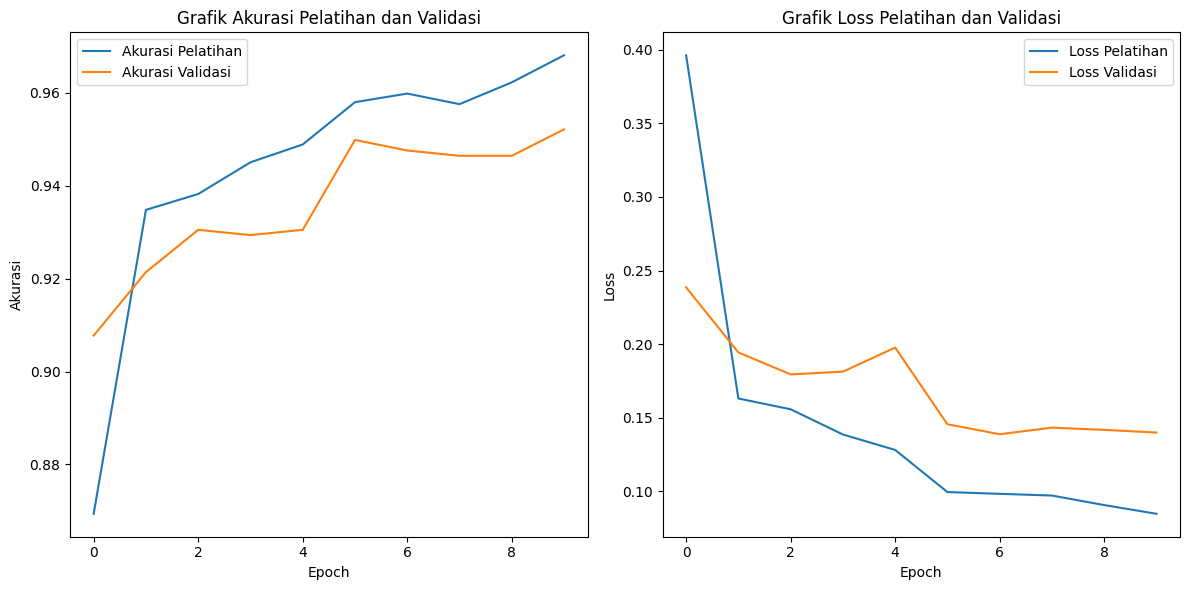

In [13]:
import matplotlib.pyplot as plt

# Evaluasi model menggunakan data validasi
loss, accuracy = model.evaluate(valid_generator, verbose=1)
print(f"Loss pada data validasi: {loss}")
print(f"Akurasi pada data validasi: {accuracy}")

# Mendapatkan riwayat pelatihan dari objek history
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

# Plot grafik akurasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Grafik pertama untuk akurasi
plt.plot(train_acc, label='Akurasi Pelatihan')
plt.plot(valid_acc, label='Akurasi Validasi')
plt.title('Grafik Akurasi Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot grafik loss
plt.subplot(1, 2, 2)  # Grafik kedua untuk loss
plt.plot(train_loss, label='Loss Pelatihan')
plt.plot(valid_loss, label='Loss Validasi')
plt.title('Grafik Loss Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Menampilkan kedua grafik
plt.tight_layout()
plt.show()


In [ ]:
# Evaluasi Confussion matrix
import numpy as np
from sklearn.metrics import classification_report

# Create the test generator
test_generator = create_test_generator(test_df)

# Make predictions on the test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels from the test DataFrame
# true_classes = test_generator.classes  # Incorrect: DataFrameIterator has no 'classes'
true_classes = test_df['category'].astype('category').cat.codes # Correct: Access labels from the DataFrame

# Get class labels from the test generator
# class_labels = list(test_generator.class_indices.keys()) # Incorrect: DataFrameIterator used for prediction has no class_indices
class_labels = list(df['category'].unique()) # Correct: Getting unique class labels from training data

# Generate the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

# Print the report
print(report)

Found 879 validated image filenames.
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 541ms/step
                precision    recall  f1-score   support

       Healthy       0.96      0.90      0.93       281
        Blight       0.89      0.96      0.92       255
Gray_Leaf_Spot       1.00      1.00      1.00       343

      accuracy                           0.95       879
     macro avg       0.95      0.95      0.95       879
  weighted avg       0.96      0.95      0.95       879



In [15]:
model.save("model.h5")

In [18]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.32.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [19]:
# Mengonversi model Keras (.h5) ke format TensorFlow.js (.json)
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

# Python untuk membuat label.txt
import os

# Tentukan path ke dataset yang berisi subfolder untuk setiap kelas
dataset_dir = '/content/dataset/corn/data'  # Ganti dengan path dataset Anda

# Ambil daftar subfolder yang mewakili kelas
class_labels = sorted(os.listdir(dataset_dir))

# Tulis nama-nama kelas ke file label.txt
with open('label.txt', 'w') as f:
    for label in class_labels:
        f.write(f"{label}\n")

print("File label.txt telah dibuat!")


2025-05-21 07:56:28.752853: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747814188.788119   11029 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747814188.798364   11029 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file
File label.txt telah dibuat!


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Masukkan path gambar yang ingin diprediksi: /content/jagung sehat.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


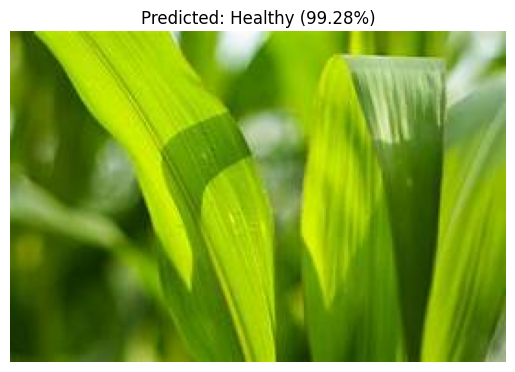

In [22]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# Fungsi untuk memuat model TensorFlow (menggunakan load_model untuk .h5)
def load_keras_model(model_path):
    # Menggunakan tf.keras.models.load_model untuk memuat model .h5
    model = tf.keras.models.load_model(model_path)
    return model

# Fungsi untuk memproses gambar agar sesuai dengan input model
def preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path).convert('RGB')  # Pastikan 3 channel
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    img_array = img_array / 255.0  # Normalisasi piksel
    return img_array

# Fungsi untuk melakukan inferensi dan menampilkan hasil
def predict_and_display(image_path, model, class_labels):
    try:
        # Proses gambar
        processed_image = preprocess_image(image_path)

        # Lakukan prediksi
        # Untuk model Keras yang dimuat dengan load_model, gunakan model.predict
        predictions = model.predict(processed_image)
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        predicted_class = class_labels[predicted_class_index]
        confidence = predictions[0][predicted_class_index] * 100

        # Tampilkan gambar dan prediksi
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
        plt.axis('off')
        plt.show()

    except FileNotFoundError:
        print(f"Error: Gambar tidak ditemukan di {image_path}")
    except Exception as e:
        print(f"Terjadi kesalahan saat prediksi atau menampilkan gambar: {e}")

# Main program
def main():
    # Path ke model Keras .h5
    saved_model_path = '/content/model.h5'  # Path model .h5
    label_file_path = '/content/label.txt'  # Path file label Anda

    # Muat model menggunakan fungsi yang diperbarui
    model = load_keras_model(saved_model_path)

    # Muat label dari file
    with open(label_file_path, 'r') as f:
        class_labels = f.read().splitlines()

    # Ambil gambar dari lokal untuk prediksi
    image_path = input("Masukkan path gambar yang ingin diprediksi: ")

    if not os.path.exists(image_path):
        print("Gambar tidak ditemukan di path yang diberikan!")
        return

    # Lakukan prediksi dan tampilkan gambar
    predict_and_display(image_path, model, class_labels)

if __name__ == "__main__":
    main()